# Improved Flight Price Prediction

## ~ <u><i>'Extreme Gradient Boosting Model'</i></u>

#### Required Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import xgboost 
from xgboost import XGBRegressor

### Reading Dataset and Creating DataFrame

In [21]:
df = pd.read_excel("Again_Preprocessed_Flight_data.xlsx")
df.head()

,Unnamed: 0,Name,From,To,Stops,Extra Services,Price,Encoded Route,Duration,Month,Day
0,0,1,0,5,1,8,17135,3,2345,3,1
1,1,10,0,5,4,8,21520,18,160,3,1
2,2,4,0,5,0,8,26890,5,435,3,1
3,3,1,0,5,0,8,23677,5,330,3,1
4,4,3,0,5,4,8,11934,18,170,3,1


In [22]:
# dropping Unnamed Column

df.rename({"Unnamed: 0":"False"}, axis=1, inplace=True)
df.drop(["False"], axis=1, inplace=True)

df.head()

,Name,From,To,Stops,Extra Services,Price,Encoded Route,Duration,Month,Day
0,1,0,5,1,8,17135,3,2345,3,1
1,10,0,5,4,8,21520,18,160,3,1
2,4,0,5,0,8,26890,5,435,3,1
3,1,0,5,0,8,23677,5,330,3,1
4,3,0,5,4,8,11934,18,170,3,1


#### List of Features

In [4]:
df.columns

Index(['Name', 'From', 'To', 'Stops', 'Extra Services', 'Price',
       'Encoded Route', 'Duration', 'Month', 'Day'],
      dtype='object')

#### Dataset Descripton

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 10 columns):
Name              10682 non-null int64
From              10682 non-null int64
To                10682 non-null int64
Stops             10682 non-null int64
Extra Services    10682 non-null int64
Price             10682 non-null int64
Encoded Route     10682 non-null int64
Duration          10682 non-null int64
Month             10682 non-null int64
Day               10682 non-null int64
dtypes: int64(10)
memory usage: 834.6 KB


In [6]:
df.describe()

,Name,From,To,Stops,Extra Services,Price,Encoded Route,Duration,Month,Day
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,1.458248,7.392998,9087.214567,74.820165,643.020502,4.708575,13.509081
std,2.352090,1.177276,1.474845,1.806320,1.214254,4611.548810,36.729039,507.830133,1.164408,8.479363
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,0.000000,5.000000,3.000000,1.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,5277.000000,48.000000,170.000000,3.000000,6.000000
50%,4.000000,2.000000,1.000000,0.000000,8.000000,8372.000000,73.000000,520.000000,5.000000,12.000000
75%,4.000000,3.000000,2.000000,4.000000,8.000000,12373.000000,104.000000,930.000000,6.000000,21.000000
max,11.000000,4.000000,5.000000,4.000000,9.000000,79512.000000,127.000000,2860.000000,6.000000,27.000000


#### Correlation Matrix

In [23]:
# By Default Pearson's Correlation

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Name,From,To,Stops,Extra Services,Price,Encoded Route,Duration,Month,Day
Name,1,-0.013397,0.0184457,0.0359727,-0.0607477,-0.0395648,0.0252143,-0.159651,0.0246742,0.0261368
From,-0.013397,1,-0.592576,-0.225605,-0.0221088,0.0159992,0.403412,0.161886,0.183268,0.00490164
To,0.0184457,-0.592576,1,0.337872,0.0268207,-0.0711225,-0.461176,-0.257352,-0.364682,-0.0410245
Stops,0.0359727,-0.225605,0.337872,1,0.164054,-0.571221,-0.437749,-0.602282,-0.0263284,0.0292249
Extra Services,-0.0607477,-0.0221088,0.0268207,0.164054,1,-0.0654625,0.0351522,-0.16787,-0.0514907,-0.0162961
Price,-0.0395648,0.0159992,-0.0711225,-0.571221,-0.0654625,1,0.164149,0.50648,-0.103643,-0.153774
Encoded Route,0.0252143,0.403412,-0.461176,-0.437749,0.0351522,0.164149,1,0.288773,0.244186,0.0816317
Duration,-0.159651,0.161886,-0.257352,-0.602282,-0.16787,0.50648,0.288773,1,0.014836,-0.0224387
Month,0.0246742,0.183268,-0.364682,-0.0263284,-0.0514907,-0.103643,0.244186,0.014836,1,-0.0383586
Day,0.0261368,0.00490164,-0.0410245,0.0292249,-0.0162961,-0.153774,0.0816317,-0.0224387,-0.0383586,1


In [8]:
# Shape of Dataset

df.shape

(10682, 10)

## <u>Model Bulding - XGBModel</u>

#### Separating <i>Regressand</i> and <i>Regressor<i>

In [25]:
# Dependent Variables

X = df[['Name', 'From', 'To', 'Stops', 'Extra Services', 'Encoded Route', 'Duration', 'Month', 'Day']].values

# Independent Variable

Y = df['Price'].values

#### Scaling and Transforming X 

In [26]:
# scaling X in range of 0 to 1000

scaler = MinMaxScaler(feature_range=(0,1000))
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1000))

In [27]:
# transforming X

X=scaler.transform(X)

#### Splitting Dataset into <i>Test</i> and <i>Train</i> Data

In [37]:
# Splitting 70% as Train Data & 30% as Test Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [38]:
X_test

array([[ 363.63636364,  500.        ,  200.        , ...,  586.69001751,
        1000.        ,   76.92307692],
       [ 363.63636364,  500.        ,  200.        , ...,  497.37302977,
        1000.        ,   76.92307692],
       [ 909.09090909,  750.        ,    0.        , ...,  243.43257443,
         666.66666667,  192.30769231],
       ...,
       [  90.90909091, 1000.        ,  600.        , ...,   26.26970228,
         666.66666667,  653.84615385],
       [  90.90909091,  750.        ,    0.        , ...,  406.30472855,
         666.66666667,  884.61538462],
       [ 363.63636364,    0.        ,  400.        , ...,   61.29597198,
        1000.        ,  769.23076923]])

In [13]:
# train data shape

X_train.shape

(7477, 9)

In [14]:
# test data shape

X_test.shape

(3205, 9)

In [15]:
# dataset shape

df.shape

(10682, 10)

In [16]:
# target training variable shape

Y_train.shape

(7477,)

In [17]:
# target test variable shape

Y_test.shape

(3205,)

#### Fitting Data into Model

In [29]:
# XGB Model

xgb = xgboost.XGBRegressor(n_estimators=325, learning_rate=0.4, gamma=0, subsample=0.89,colsample_bytree=1, max_depth=6)

In [30]:
# Fitting data in model

xgb.fit(X_train,Y_train)

[10:23:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.4, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=325,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.89, verbosity=1)

#### Model Prediction

In [31]:
# prediction by model

Y_predicted = xgb.predict(X_test)

In [35]:
# Actual vs Predicted Value

test_dataframe = pd.DataFrame({'Original': Y_test, 'Predicted': Y_predicted})
test_dataframe.tail(10)

,Original,Predicted
3195,8040,5359.263672
3196,10262,10199.585938
3197,14781,14494.036133
3198,5228,5816.035156
3199,3943,4681.984863
3200,4804,4912.891602
3201,10262,10229.573242
3202,3100,3155.749268
3203,15107,14523.157227
3204,5769,6749.609863


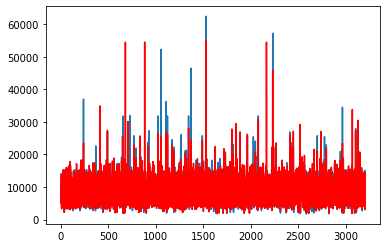

In [22]:
plt.plot(Y_test)
plt.plot(Y_predicted, color='red')
plt.show()

#### Model Errors

In [23]:
# Mean Absolute Error

metrics.mean_absolute_error(Y_test, Y_predicted)

873.4046344441668

In [24]:
# Mean Sqaured Error

metrics.mean_squared_error(Y_test, Y_predicted)

4503721.023896603

In [25]:
# Root Mean Squared Error

np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted))

2122.1972160703167

#### Accuracy of Model

In [36]:
accuracy = xgb.score(X_test,Y_test)
print(accuracy*100)

79.82134597999493


In [4]:
df = pd.read_excel("Again_Preprocessed_Flight_data.xlsx")
df.head()

,Unnamed: 0,Name,From,To,Stops,Extra Services,Price,Encoded Route,Duration,Month,Day
0,0,1,0,5,1,8,17135,3,2345,3,1
1,1,10,0,5,4,8,21520,18,160,3,1
2,2,4,0,5,0,8,26890,5,435,3,1
3,3,1,0,5,0,8,23677,5,330,3,1
4,4,3,0,5,4,8,11934,18,170,3,1


In [5]:
# dropping Unnamed Column

df.rename({"Unnamed: 0":"False"}, axis=1, inplace=True)
df.drop(["False"], axis=1, inplace=True)

df.head()

,Name,From,To,Stops,Extra Services,Price,Encoded Route,Duration,Month,Day
0,1,0,5,1,8,17135,3,2345,3,1
1,10,0,5,4,8,21520,18,160,3,1
2,4,0,5,0,8,26890,5,435,3,1
3,1,0,5,0,8,23677,5,330,3,1
4,3,0,5,4,8,11934,18,170,3,1


In [6]:
# data=data.append({"Name":3,"From":0,"To":5,"Time of Flight":170,"Stops":4,"Day":24,"Month":3,"Route_1":0,"Route_2":13,"Route_3":29,"Route_4":13,"Route_5":5},ignore_index=True)
data=df.drop(['Price'],1)

data.head()

,Name,From,To,Stops,Extra Services,Encoded Route,Duration,Month,Day
0,1,0,5,1,8,3,2345,3,1
1,10,0,5,4,8,18,160,3,1
2,4,0,5,0,8,5,435,3,1
3,1,0,5,0,8,5,330,3,1
4,3,0,5,4,8,18,170,3,1


In [7]:
X = np.array(df.drop(['Price'],1))

In [31]:
X[0]

array([   1,    0,    5,    1,    8,    3, 2345,    3,    1], dtype=int64)

In [32]:
data.head(2)

,Name,From,To,Stops,Extra Services,Encoded Route,Duration,Month,Day
0,1,0,5,1,8,3,2345,3,1
1,10,0,5,4,8,18,160,3,1


In [33]:
data = np.array(data)

In [34]:
data

array([[   1,    0,    5, ..., 2345,    3,    1],
       [  10,    0,    5, ...,  160,    3,    1],
       [   4,    0,    5, ...,  435,    3,    1],
       ...,
       [  10,    0,    2, ...,  170,    6,    9],
       [   6,    2,    1, ...,  660,    6,    9],
       [   1,    2,    1, ..., 1420,    6,    9]], dtype=int64)

In [35]:
y = df['Price'].values

In [36]:
y

array([17135, 21520, 26890, ...,  4668,  7408, 11185], dtype=int64)

In [8]:
# Dependent Variables

X = df[['Name', 'From', 'To', 'Stops', 'Extra Services', 'Encoded Route', 'Duration', 'Month', 'Day']].values

# Independent Variable

Y = df['Price'].values

In [9]:
scaler = MinMaxScaler(feature_range=(0,1000))
print(scaler.fit(X))
print(scaler.fit(data))

MinMaxScaler(copy=True, feature_range=(0, 1000))
MinMaxScaler(copy=True, feature_range=(0, 1000))


In [10]:
X=scaler.transform(X)
data=scaler.transform(data)

In [40]:
X

array([[  90.90909091,    0.        , 1000.        , ...,  819.61471103,
           0.        ,    0.        ],
       [ 909.09090909,    0.        , 1000.        , ...,   54.29071804,
           0.        ,    0.        ],
       [ 363.63636364,    0.        , 1000.        , ...,  150.61295972,
           0.        ,    0.        ],
       ...,
       [ 909.09090909,    0.        ,  400.        , ...,   57.79334501,
        1000.        ,  307.69230769],
       [ 545.45454545,  500.        ,  200.        , ...,  229.42206655,
        1000.        ,  307.69230769],
       [  90.90909091,  500.        ,  200.        , ...,  495.62171629,
        1000.        ,  307.69230769]])

In [41]:
data

array([[  90.90909091,    0.        , 1000.        , ...,  819.61471103,
           0.        ,    0.        ],
       [ 909.09090909,    0.        , 1000.        , ...,   54.29071804,
           0.        ,    0.        ],
       [ 363.63636364,    0.        , 1000.        , ...,  150.61295972,
           0.        ,    0.        ],
       ...,
       [ 909.09090909,    0.        ,  400.        , ...,   57.79334501,
        1000.        ,  307.69230769],
       [ 545.45454545,  500.        ,  200.        , ...,  229.42206655,
        1000.        ,  307.69230769],
       [  90.90909091,  500.        ,  200.        , ...,  495.62171629,
        1000.        ,  307.69230769]])

In [42]:
data[4]

array([ 272.72727273,    0.        , 1000.        , 1000.        ,
        888.88888889,  141.73228346,   57.79334501,    0.        ,
          0.        ])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=123)

In [44]:
X_train.shape

(7477, 9)

In [45]:
X_test.shape

(3205, 9)

In [46]:
df.shape

(10682, 10)

In [47]:
y_train.shape

(7477,)

In [48]:
y_test.shape

(3205,)

# Extreme Gradient Boosting

In [11]:
xgb = xgboost.XGBRegressor(n_estimators=325, learning_rate=0.4, gamma=0, subsample=0.89,
                           colsample_bytree=1, max_depth=6)

In [13]:
xgb.fit(X,Y)

# xgb.fit(X_train, y_train)

[10:20:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.4, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=325,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.89, verbosity=1)

In [17]:
predictions = xgb.predict(X_test)

In [20]:
test_dataframe = pd.DataFrame({'Original': y_test, 'Predicted': predictions})
print(test_dataframe.head(20))

    Original     Predicted
0       7229   6878.621094
1       6296   6120.173340
2      12537  10258.059570
3       6442   6516.123535
4      10703  10567.632812
5       9345   9049.190430
6      16704  15602.381836
7       6416   6232.521973
8      19907  20009.941406
9      14762  14478.520508
10      7191   7223.045898
11     15603  15944.922852
12      6953   6814.843262
13      5228   5795.935547
14      1965   1790.552612
15     15129  15776.637695
16      8586   9054.422852
17      6442   6167.852051
18     10262  10206.785156
19      3419   4119.992676


In [19]:
accuracy = xgb.score(X_test,y_test)

print(accuracy*100)

97.34576088168177


In [54]:
df[10430:10440]

,Name,From,To,Stops,Extra Services,Price,Encoded Route,Duration,Month,Day
10430,8,3,0,4,7,3841,64,150,6,9
10431,1,3,0,2,8,14960,79,805,6,9
10432,1,2,1,0,8,7690,121,1640,6,9
10433,1,2,1,0,8,6587,125,1535,6,9
10434,4,0,2,4,5,7229,18,180,6,9
10435,2,2,1,0,8,5281,104,540,6,9
10436,4,3,0,0,8,14939,66,735,6,9
10437,4,3,0,0,5,11841,66,800,6,9
10438,4,3,0,0,8,14151,73,1005,6,9
10439,3,0,2,4,8,4823,18,170,6,9
